In [37]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, cross_val_score

In [38]:
PATH = 'Steel_industry_data.csv'
df = pd.read_csv(PATH)

In [39]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [40]:
df.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [41]:
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [42]:
print(df.size, df.shape)

385440 (35040, 11)


In [43]:
print(df.columns)
print(df.dtypes)

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')
date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object


In [44]:
df1 = df[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh',
          'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor',
         'NSM']]

def find_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    IQR = q3 - q1
    ll = q1 - (1.5*IQR)
    ul = q3 + (1.5*IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return(bad_indices)

for name in df1.columns:
    print(name, (len(find_outliers(df1[name])) / len(df1[name])) * 100)
    

Usage_kWh 0.9360730593607305
Lagging_Current_Reactive.Power_kVarh 3.022260273972603
Leading_Current_Reactive_Power_kVarh 22.143264840182646
CO2(tCO2) 1.2471461187214612
Lagging_Current_Power_Factor 0.0028538812785388126
Leading_Current_Power_Factor 23.764269406392692
NSM 0.0


In [45]:
df1['CO2(tCO2)'].dtype

dtype('float64')

<Axes: xlabel='Usage_kWh'>

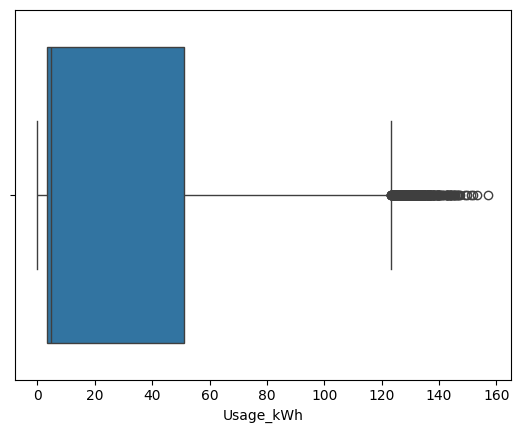

In [46]:
sns.boxplot(data=df, x="Usage_kWh")

<Axes: xlabel='Lagging_Current_Reactive.Power_kVarh'>

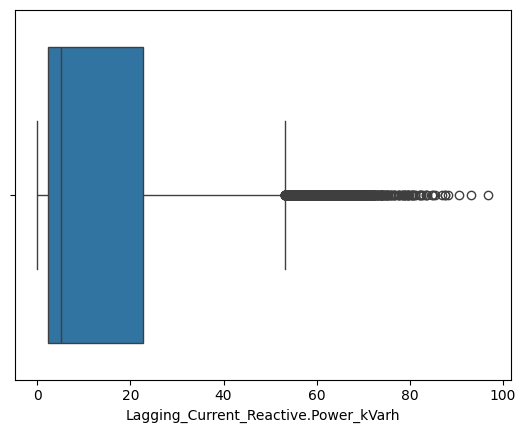

In [47]:
sns.boxplot(data=df, x="Lagging_Current_Reactive.Power_kVarh")

<Axes: xlabel='Leading_Current_Reactive_Power_kVarh'>

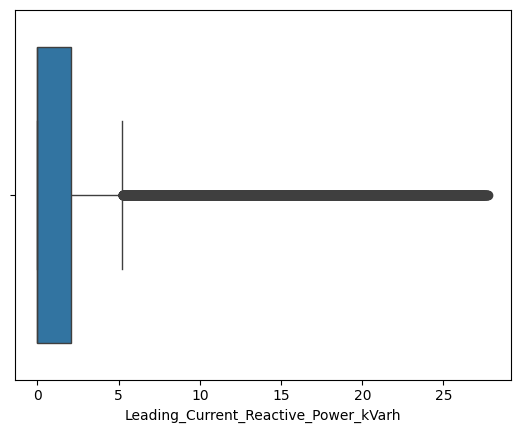

In [48]:
sns.boxplot(data=df, x="Leading_Current_Reactive_Power_kVarh")

<Axes: xlabel='CO2(tCO2)'>

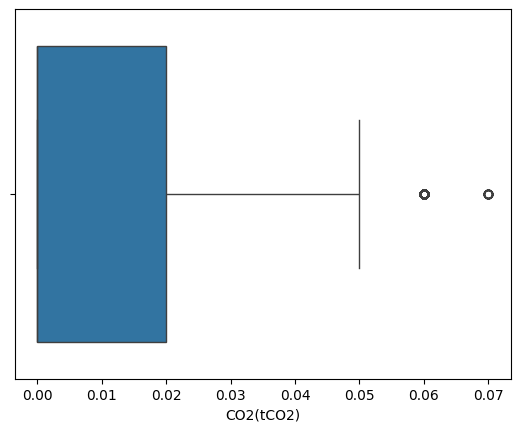

In [49]:
sns.boxplot(data=df, x="CO2(tCO2)")

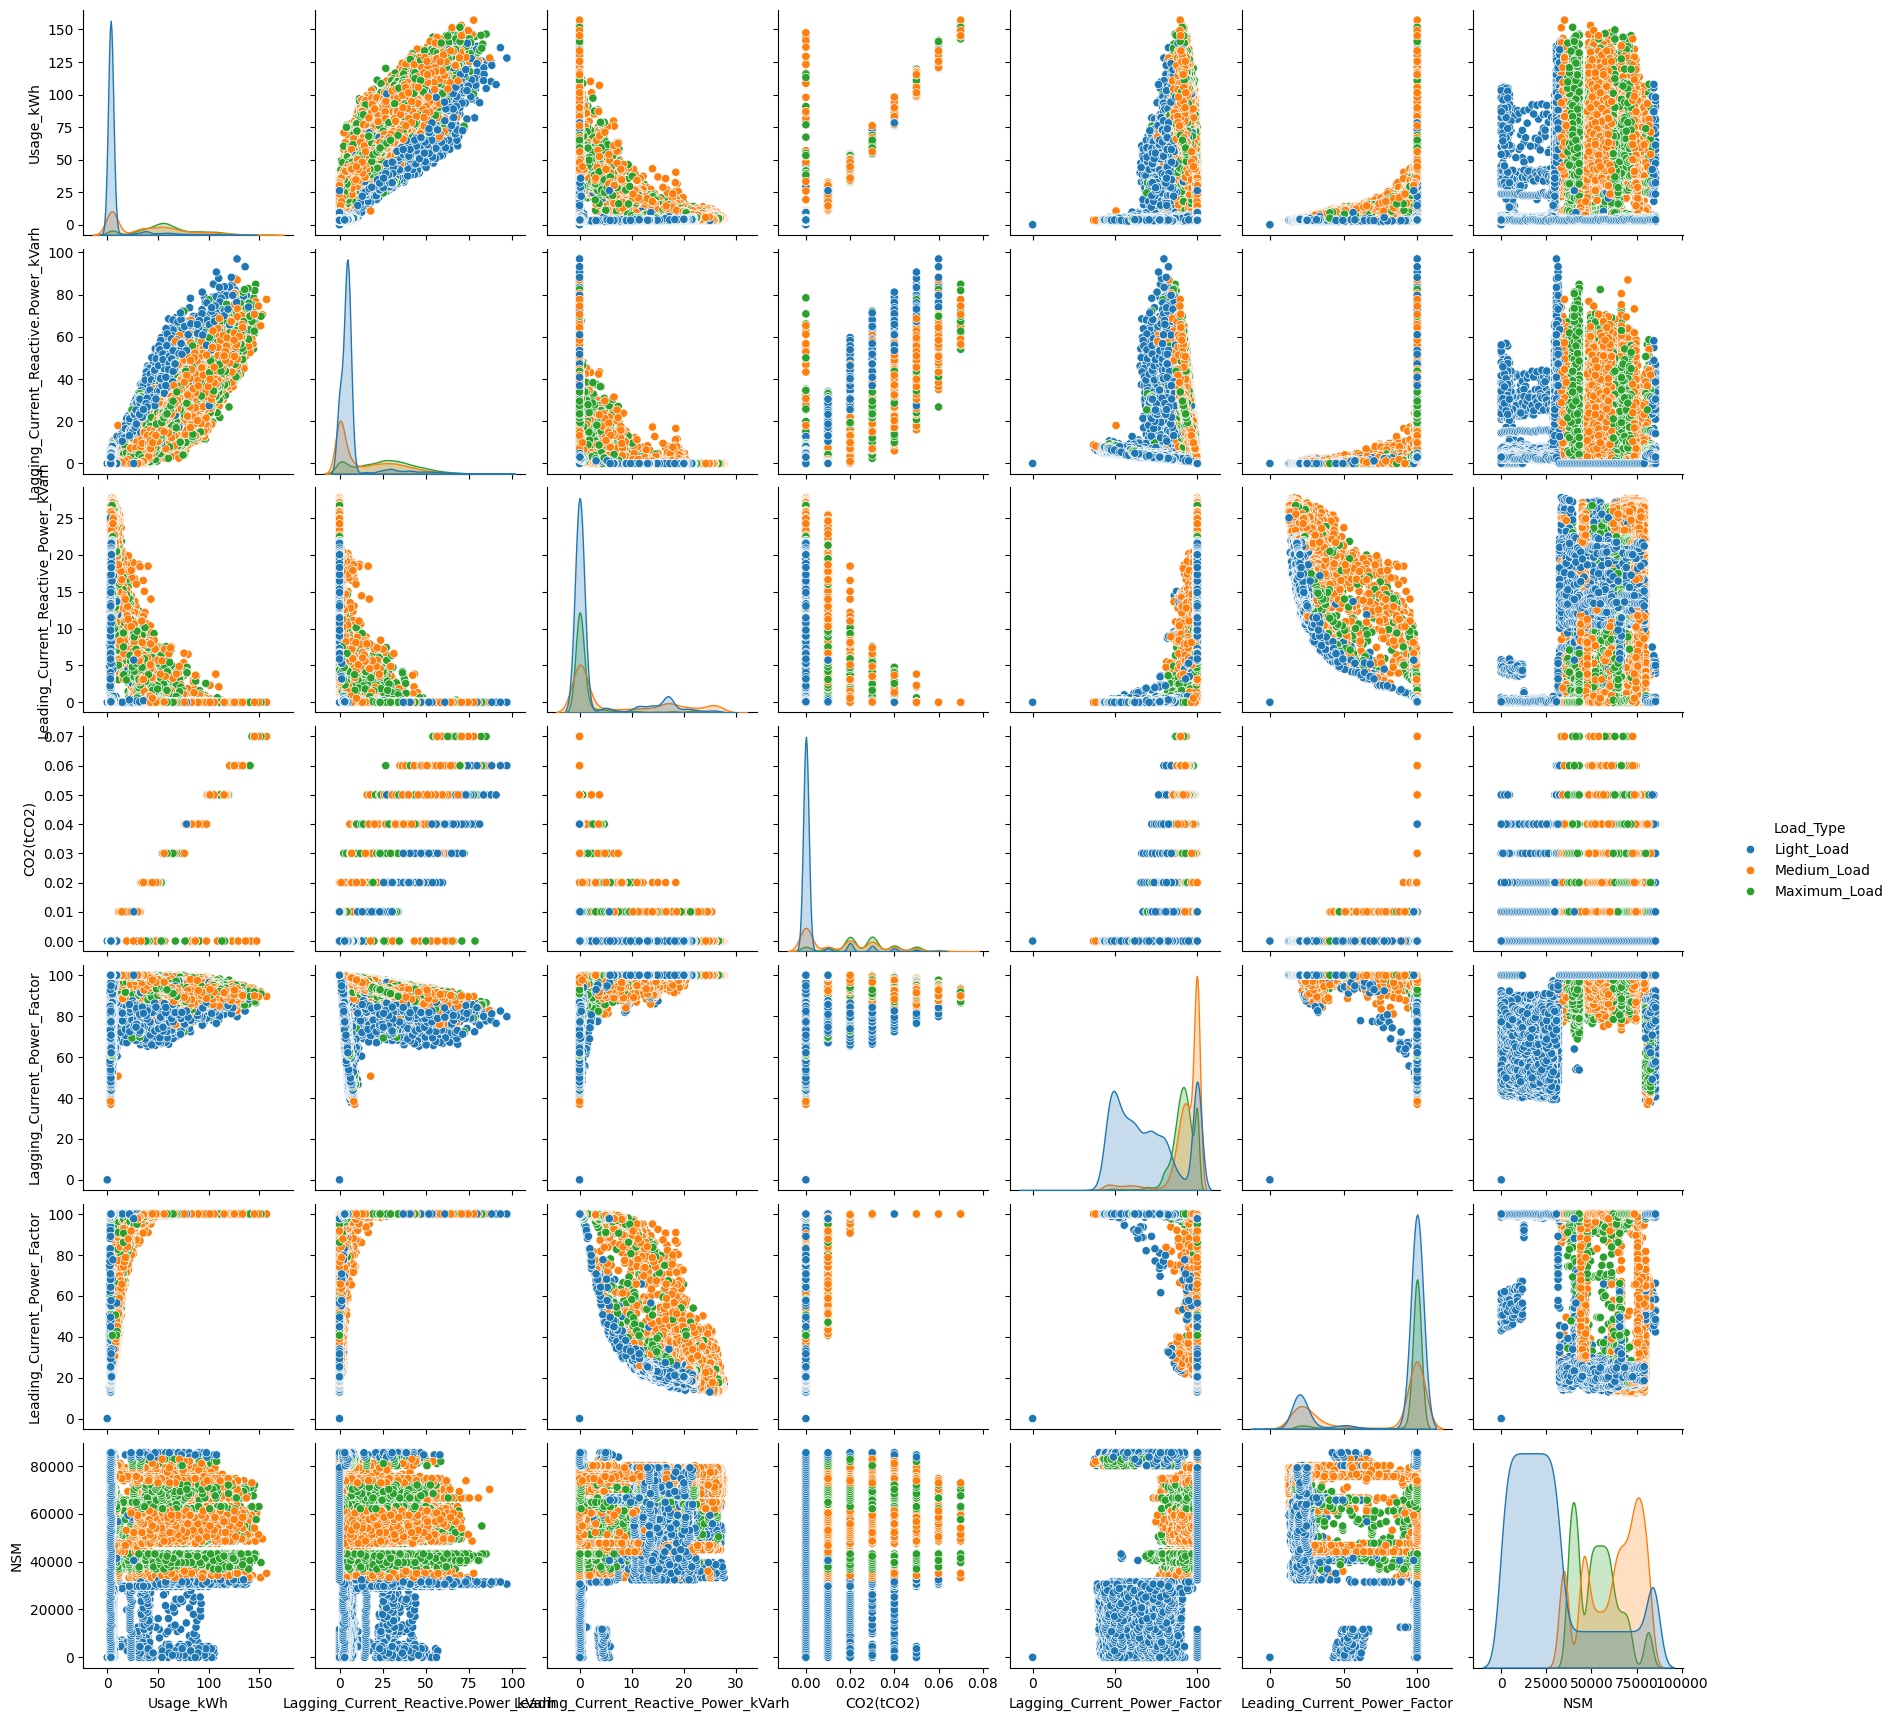

In [50]:
sns.pairplot(df,hue='Load_Type')

In [51]:
df['date'] = pd.to_datetime(df['date'], format='mixed')

df['year'] = df['date'].dt.year
print(df['year'].value_counts())
df = df.drop('year', axis = 1)

df['month'] = df['date'].dt.month
print(df['month'].value_counts())

# df['hourMin'] = str(df['date'].dt.hour) + str(df['date'].dt.minute)
# print(df['hourMin'])

year
2018    35040
Name: count, dtype: int64
month
1     2976
3     2976
5     2976
7     2976
8     2976
10    2976
12    2976
4     2880
6     2880
9     2880
11    2880
2     2688
Name: count, dtype: int64


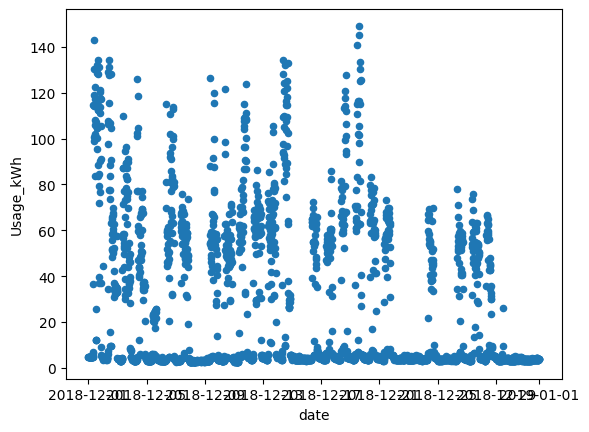

In [52]:
ax1 = df[df['month'] == 12].plot.scatter(x='date', y='Usage_kWh')

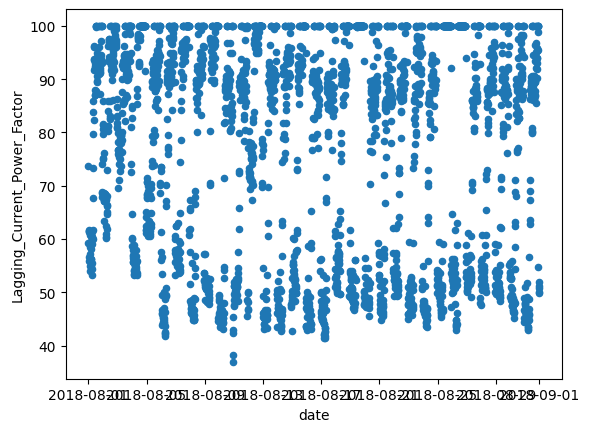

In [53]:
ax1 = df[df['month'] == 8].plot.scatter(x='date', y='Lagging_Current_Power_Factor')

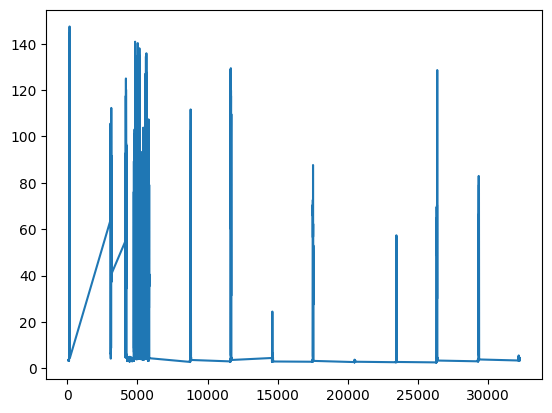

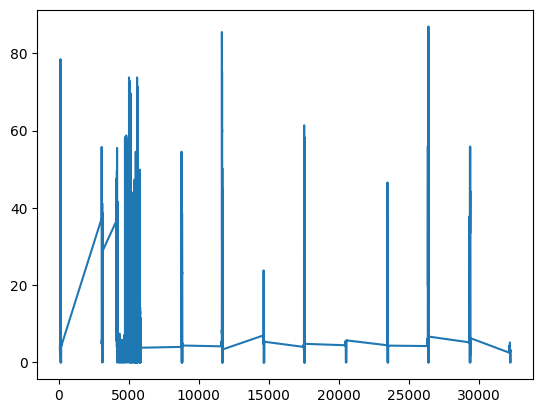

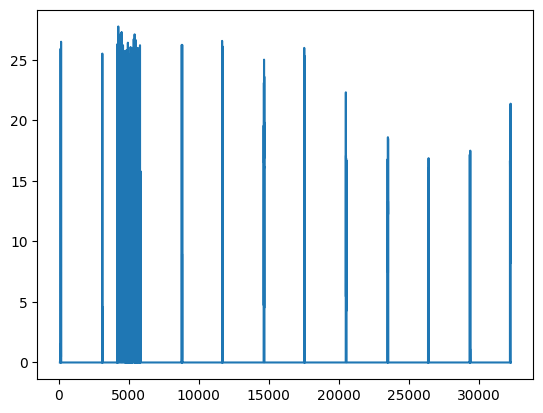

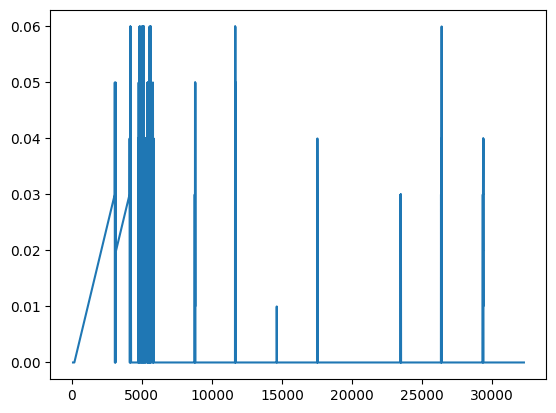

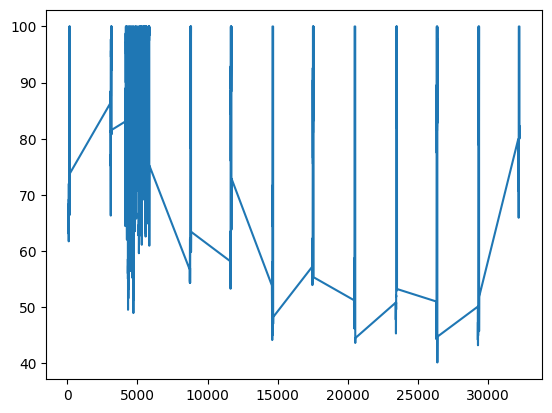

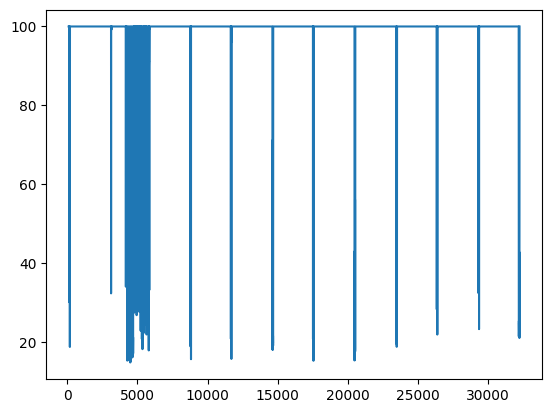

In [54]:
month = 2

df[df['month']==month]['Usage_kWh'].plot()
plt.show()

df[df['month']==month]['Lagging_Current_Reactive.Power_kVarh'].plot()
plt.show()

df[df['month']==month]['Leading_Current_Reactive_Power_kVarh'].plot()
plt.show()

df[df['month']==month]['CO2(tCO2)'].plot()
plt.show()

df[df['month']==month]['Lagging_Current_Power_Factor'].plot()
plt.show()

df[df['month']==month]['Leading_Current_Power_Factor'].plot()
plt.show()

In [55]:
print(df['WeekStatus'].value_counts())

df['Weekday'] = np.where(df['WeekStatus'] == 'Weekday', 1, 0)
df = df.drop('WeekStatus', axis=1)

df.groupby('Load_Type')[['Weekday']].value_counts()

WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64


Load_Type     Weekday
Light_Load    1          11168
              0           6904
Maximum_Load  1           5952
              0           1320
Medium_Load   1           7936
              0           1760
Name: count, dtype: int64

In [56]:
pd.crosstab(df['Day_of_week'], df['Load_Type'])

Load_Type,Light_Load,Maximum_Load,Medium_Load
Day_of_week,,,
Friday,2192,1200,1600
Monday,2288,1200,1600
Saturday,2864,912,1216
Sunday,4040,408,544
Thursday,2192,1200,1600
Tuesday,2248,1176,1568
Wednesday,2248,1176,1568


In [57]:
for wd in df['Day_of_week'].unique():
    df[wd] = np.where(df['Day_of_week'] == wd, 1, 0)
    
df = df.drop('Day_of_week', axis=1)

In [58]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,month,Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load,1,1,1,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load,1,1,1,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load,1,1,1,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load,1,1,1,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Light_Load,1,1,1,0,0,0,0,0,0


In [59]:
df['delta_Usage_kWh'] = df.Usage_kWh.diff().shift(-1)
df['delta_Lagging_Current_Reactive.Power_kVarh'] = df['Lagging_Current_Reactive.Power_kVarh'].diff().shift(-1)
df['delta_Leading_Current_Reactive_Power_kVarh'] = df['Leading_Current_Reactive_Power_kVarh'].diff().shift(-1)
df['delta_CO2(tCO2)'] = df['CO2(tCO2)'].diff().shift(-1)
df['delta_Lagging_Current_Power_Factor'] = df.Lagging_Current_Power_Factor.diff().shift(-1)
df['delta_Leading_Current_Power_Factor'] = df.Leading_Current_Power_Factor.diff().shift(-1)
df['delta_NSM'] = df.NSM.diff().shift(-1)

In [60]:
df['delta_Usage_kWh_max'] = df.delta_Usage_kWh.rolling(4).max()
# df['delta_Usage_kWh_corr'] = df.delta_Usage_kWh.rolling(4).corr()
df['delta_Usage_kWh_min'] = df.delta_Usage_kWh.rolling(4).min()

df['delta_Lagging_Current_Reactive.Power_kVarh_max'] = df['delta_Lagging_Current_Reactive.Power_kVarh'].rolling(4).max()
# df['delta_Lagging_Current_Reactive.Power_kVarh_corr'] = df['delta_Lagging_Current_Reactive.Power_kVarh'].rolling(4).corr()
df['delta_Lagging_Current_Reactive.Power_kVarh_min'] = df['delta_Lagging_Current_Reactive.Power_kVarh'].rolling(4).min()

df['delta_Leading_Current_Reactive_Power_kVarh_max'] = df['delta_Leading_Current_Reactive_Power_kVarh'].rolling(4).max()
# df['delta_Leading_Current_Reactive_Power_kVarh_corr'] = df['delta_Leading_Current_Reactive_Power_kVarh'].rolling(4).corr()
df['delta_Leading_Current_Reactive_Power_kVarh_min'] = df['delta_Leading_Current_Reactive_Power_kVarh'].rolling(4).min()

In [61]:
df.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,month,...,delta_CO2(tCO2),delta_Lagging_Current_Power_Factor,delta_Leading_Current_Power_Factor,delta_NSM,delta_Usage_kWh_max,delta_Usage_kWh_min,delta_Lagging_Current_Reactive.Power_kVarh_max,delta_Lagging_Current_Reactive.Power_kVarh_min,delta_Leading_Current_Reactive_Power_kVarh_max,delta_Leading_Current_Reactive_Power_kVarh_min
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Light_Load,1,...,0.0,-6.44,0.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Light_Load,1,...,0.0,3.51,0.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Light_Load,1,...,0.0,-2.19,0.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Light_Load,1,...,0.0,-3.37,0.0,900.0,0.83,-0.76,1.51,-1.18,0.0,0.0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Light_Load,1,...,0.0,3.04,0.0,900.0,0.51,-0.76,0.94,-1.18,0.0,0.0
5,2018-01-01 01:30:00,3.28,3.56,0.0,0.0,67.76,100.0,5400,Light_Load,1,...,0.0,-2.14,0.0,900.0,0.51,-0.54,0.94,-0.94,0.0,0.0
6,2018-01-01 01:45:00,3.60,4.14,0.0,0.0,65.62,100.0,6300,Light_Load,1,...,0.0,-1.25,0.0,900.0,0.51,-0.54,0.94,-0.94,0.0,0.0
7,2018-01-01 02:00:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Light_Load,1,...,0.0,2.57,0.0,900.0,0.32,-0.54,0.58,-0.94,0.0,0.0
8,2018-01-01 02:15:00,3.28,3.64,0.0,0.0,66.94,100.0,8100,Light_Load,1,...,0.0,-4.43,0.0,900.0,0.50,-0.32,1.08,-0.64,0.0,0.0
9,2018-01-01 02:30:00,3.78,4.72,0.0,0.0,62.51,100.0,9000,Light_Load,1,...,0.0,2.63,0.0,900.0,0.50,-0.32,1.08,-0.69,0.0,0.0


In [62]:
# df['Day_of_week'].replace(['Saturday', 'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'],
#                         [0, 1, 2, 3, 4, 5, 6], inplace=True)
# df.groupby('Load_Type')[['Day_of_week']].count()

In [63]:
df.dtypes

date                                              datetime64[ns]
Usage_kWh                                                float64
Lagging_Current_Reactive.Power_kVarh                     float64
Leading_Current_Reactive_Power_kVarh                     float64
CO2(tCO2)                                                float64
Lagging_Current_Power_Factor                             float64
Leading_Current_Power_Factor                             float64
NSM                                                        int64
Load_Type                                                 object
month                                                      int32
Weekday                                                    int64
Monday                                                     int64
Tuesday                                                    int64
Wednesday                                                  int64
Thursday                                                   int64
Friday                   

In [64]:
print(df['Load_Type'].value_counts())
df['Load_Type_Class'] = df['Load_Type'].replace({'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load': 2})
print(df['Load_Type_Class'].value_counts())
df = df.drop('Load_Type', axis=1)

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64
Load_Type_Class
0    18072
1     9696
2     7272
Name: count, dtype: int64


In [65]:
a = df[df['Load_Type_Class'] == 0].sample(n=10000, random_state=1)
print(a.shape)
b = df[df['Load_Type_Class'] == 1].sample(n=9696, random_state=1)
print(b.shape)
c = df[df['Load_Type_Class'] == 2].sample(n=7272, random_state=1)
print(c.shape)

(10000, 31)
(9696, 31)
(7272, 31)


In [66]:
df = pd.concat([a,b,c])

In [67]:
df['Load_Type_Class'].value_counts()

Load_Type_Class
0    10000
1     9696
2     7272
Name: count, dtype: int64

In [68]:
df = df.fillna(0)

In [69]:
# df.isnull().sum()
#sns.pairplot(df,hue='Load_Type_Class')

In [70]:
sns.stripplot(y = "Load_Type", x = "Usage_kWh",hue='Load_Type', orient = "h", data = df,size=2)
plt.show()

ValueError: Could not interpret value `Load_Type` for `y`. An entry with this name does not appear in `data`.

In [71]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26968 entries, 3972 to 24353
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   date                                            26968 non-null  datetime64[ns]
 1   Usage_kWh                                       26968 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh            26968 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh            26968 non-null  float64       
 4   CO2(tCO2)                                       26968 non-null  float64       
 5   Lagging_Current_Power_Factor                    26968 non-null  float64       
 6   Leading_Current_Power_Factor                    26968 non-null  float64       
 7   NSM                                             26968 non-null  int64         
 8   month                                           

In [72]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'month', 'Weekday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'delta_Usage_kWh',
       'delta_Lagging_Current_Reactive.Power_kVarh',
       'delta_Leading_Current_Reactive_Power_kVarh', 'delta_CO2(tCO2)',
       'delta_Lagging_Current_Power_Factor',
       'delta_Leading_Current_Power_Factor', 'delta_NSM',
       'delta_Usage_kWh_max', 'delta_Usage_kWh_min',
       'delta_Lagging_Current_Reactive.Power_kVarh_max',
       'delta_Lagging_Current_Reactive.Power_kVarh_min',
       'delta_Leading_Current_Reactive_Power_kVarh_max',
       'delta_Leading_Current_Reactive_Power_kVarh_min', 'Load_Type_Class'],
      dtype='object')

In [73]:
features = df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
        'month', 'Weekday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'delta_Usage_kWh',
       'delta_Lagging_Current_Reactive.Power_kVarh',
       'delta_Leading_Current_Reactive_Power_kVarh', 'delta_CO2(tCO2)',
       'delta_Lagging_Current_Power_Factor',
       'delta_Leading_Current_Power_Factor', 'delta_NSM',
       'delta_Usage_kWh_max', 'delta_Usage_kWh_min',
       'delta_Lagging_Current_Reactive.Power_kVarh_max',
       'delta_Lagging_Current_Reactive.Power_kVarh_min',
       'delta_Leading_Current_Reactive_Power_kVarh_max',
       'delta_Leading_Current_Reactive_Power_kVarh_min']]
target = df['Load_Type_Class']
labels = df['Load_Type_Class']

In [74]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [75]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2,shuffle=True)

In [76]:
Xtrain.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,month,Weekday,Monday,...,delta_CO2(tCO2),delta_Lagging_Current_Power_Factor,delta_Leading_Current_Power_Factor,delta_NSM,delta_Usage_kWh_max,delta_Usage_kWh_min,delta_Lagging_Current_Reactive.Power_kVarh_max,delta_Lagging_Current_Reactive.Power_kVarh_min,delta_Leading_Current_Reactive_Power_kVarh_max,delta_Leading_Current_Reactive_Power_kVarh_min
27395,59.26,38.27,0.00,0.03,84.01,100.00,32400,10,0,0,...,-0.01,1.92,0.00,900.0,23.47,-13.03,25.20,-33.05,0.00,0.00
13148,3.71,4.18,0.00,0.00,66.38,100.00,83700,5,1,0,...,0.00,-0.62,0.00,900.0,0.07,-0.07,0.07,-0.46,0.00,0.00
3714,89.03,29.45,0.00,0.04,94.94,100.00,60300,8,1,0,...,0.02,-1.26,0.00,900.0,41.76,-29.70,19.40,-6.99,0.00,0.00
20323,11.38,0.00,21.31,0.01,100.00,47.11,61200,7,1,0,...,-0.01,0.00,-2.50,900.0,-0.50,-17.10,0.00,-0.14,13.03,0.18
33359,132.01,62.28,0.00,0.06,90.44,100.00,43200,12,1,0,...,-0.05,8.92,-39.15,900.0,43.16,-118.40,25.52,-60.73,17.75,0.00


In [78]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=6)

DecisionTree.fit(Xtrain,Ytrain)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(DecisionTree, Xtrain, Ytrain, cv = k_folds)

predicted_values = DecisionTree.predict(Xtrain)

print("Cross validatin results on training set:",scores)

print("Train Scores =======")
print(classification_report(Ytrain,predicted_values))

predicted_values = DecisionTree.predict(Xtest)


print("Test Scores =======")
print(classification_report(Ytest,predicted_values))

Cross validatin results on training set: [0.85770568 0.85515643 0.85353418 0.8396292  0.86161335]
Train Scores =======
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7988
           1       0.82      0.81      0.82      7713
           2       0.78      0.81      0.79      5873

    accuracy                           0.86     21574
   macro avg       0.86      0.86      0.86     21574
weighted avg       0.86      0.86      0.86     21574

Test Scores =======
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2012
           1       0.84      0.82      0.83      1983
           2       0.78      0.80      0.79      1399

    accuracy                           0.87      5394
   macro avg       0.86      0.86      0.86      5394
weighted avg       0.87      0.87      0.87      5394



In [79]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=6)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  86.76307007786428
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2012
           1       0.84      0.82      0.83      1983
           2       0.78      0.80      0.79      1399

    accuracy                           0.87      5394
   macro avg       0.86      0.86      0.86      5394
weighted avg       0.87      0.87      0.87      5394



In [80]:
Xtrain.isnull().sum().sum()

0

In [81]:
Xtrain = Xtrain.fillna(0)
Xtest = Xtest.fillna(0)

In [82]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)
k_folds = KFold(n_splits = 5)

scores = cross_val_score(LogReg, Xtrain, Ytrain, cv = k_folds)

predicted_values = LogReg.predict(Xtrain)

print("Cross validation scores on training set:",scores)

print("Train Scores =======")
print(classification_report(Ytrain,predicted_values))

predicted_values = LogReg.predict(Xtest)


print("Test Scores =======")
print(classification_report(Ytest,predicted_values))

Cross validation scores on training set: [0.69478563 0.69223638 0.67045191 0.71332561 0.68799258]
Train Scores =======
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      7988
           1       0.62      0.74      0.67      7713
           2       0.59      0.52      0.55      5873

    accuracy                           0.69     21574
   macro avg       0.69      0.68      0.68     21574
weighted avg       0.70      0.69      0.69     21574

Test Scores =======
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2012
           1       0.63      0.74      0.68      1983
           2       0.58      0.50      0.54      1399

    accuracy                           0.69      5394
   macro avg       0.68      0.67      0.67      5394
weighted avg       0.69      0.69      0.69      5394



In [182]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)
k_folds = KFold(n_splits = 5)

scores = cross_val_score(LogReg, Xtrain, Ytrain, cv = k_folds)

predicted_values = LogReg.predict(Xtrain)
x = metrics.accuracy_score(Ytrain, predicted_values)

print("Logistic Regression's Accuracy is: ", x*100)
print("Cross val scores:",scores);

predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
scores = cross_val_score(LogReg, Xtest, Ytest, cv = k_folds)
print("Logistic Regression's Accuracy is: ", x*100)
print("Cross val scores:",scores);

print(classification_report(Ytest,predicted_values))


Logistic Regression's Accuracy is:  69.08779085936776
Cross val scores: [0.69478563 0.69223638 0.67045191 0.71332561 0.68799258]
Logistic Regression's Accuracy is:  69.00259547645533
Cross val scores: [0.6746988  0.68118628 0.69045412 0.69045412 0.69573284]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2012
           1       0.63      0.74      0.68      1983
           2       0.58      0.50      0.54      1399

    accuracy                           0.69      5394
   macro avg       0.68      0.67      0.67      5394
weighted avg       0.69      0.69      0.69      5394



In [ ]:
data = np.array([[3.17,2.95,0,0,73.21,100,900,1,2]])
prediction = LogReg.predict(data)
print(prediction)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))


In [ ]:
data = np.array([[3.17,2.95,0,0,73.21,100,900,1,2]])
prediction = RF.predict(data)
print(prediction)